In [60]:
import cv2
import numpy as np
import os

def load_bmp_images(directory):
  """
  Carga imágenes BMP desde un directorio.

  Args:
    directory: Ruta al directorio que contiene las imágenes BMP.

  Returns:
    Una lista de imágenes cargadas como arrays NumPy.
  """
  images = []
  for filename in os.listdir(directory):
    if filename.endswith(".bmp"):
      img_path = os.path.join(directory, filename)
      img = cv2.imread(img_path)
      if img is not None:
        images.append(img)
  return images


image_directory = "../data/images bmp"
images = load_bmp_images(image_directory)

if len(images) > 0:
  print(f"Se cargaron {len(images)} imágenes BMP.")
else:
  print("No se encontraron imágenes BMP en el directorio especificado.")

Se cargaron 15 imágenes BMP.


#Células Disqueratósicas

##Imagen 1

###Transformacion FFT

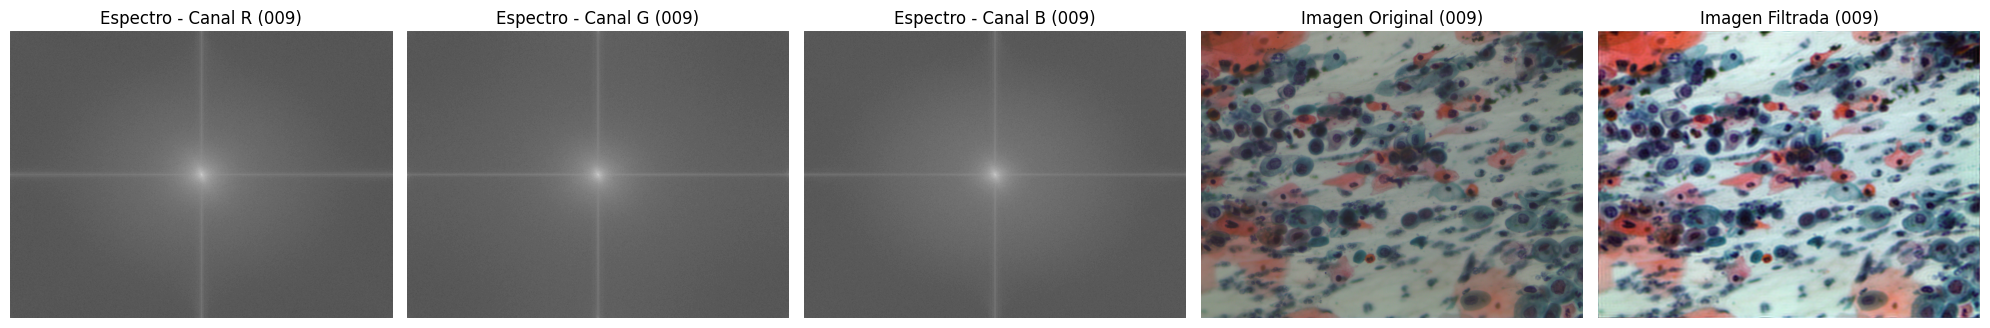

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen desde la nueva ruta proporcionada
image_path = "/content/drive/MyDrive/images bmp/009.bmp"
img = cv2.imread(image_path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separar los canales de color (R, G, B)
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Aplicar la FFT a cada canal de color y desplazar el cero al centro del espectro
r_fft_009 = np.fft.fftshift(np.fft.fft2(r_channel))
g_fft_009 = np.fft.fftshift(np.fft.fft2(g_channel))
b_fft_009 = np.fft.fftshift(np.fft.fft2(b_channel))

# Calcular el espectro de magnitud (logaritmo para mejorar la visualización)
r_magnitude_009 = np.log(np.abs(r_fft_009) + 2)
g_magnitude_009 = np.log(np.abs(g_fft_009) + 2)
b_magnitude_009 = np.log(np.abs(b_fft_009) + 2)

# Crear una máscara de filtro de paso bajo para eliminar el ruido de alta frecuencia
rows, cols = r_channel.shape
crow, ccol = rows // 2, cols // 2
radius = 100  # Radio del filtro de paso bajo

# Crear una máscara circular de paso bajo
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

# Aplicar la máscara al espectro de cada canal
r_fft_filtered_009 = r_fft_009 * mask
g_fft_filtered_009 = g_fft_009 * mask
b_fft_filtered_009 = b_fft_009 * mask

# Calcular la FFT inversa para obtener la imagen filtrada
r_ifft_009 = np.fft.ifft2(np.fft.ifftshift(r_fft_filtered_009)).real
g_ifft_009 = np.fft.ifft2(np.fft.ifftshift(g_fft_filtered_009)).real
b_ifft_009 = np.fft.ifft2(np.fft.ifftshift(b_fft_filtered_009)).real

# Normalizar los canales filtrados para visualización
r_ifft_normalized_009 = cv2.normalize(r_ifft_009, None, 0, 255, cv2.NORM_MINMAX)
g_ifft_normalized_009 = cv2.normalize(g_ifft_009, None, 0, 255, cv2.NORM_MINMAX)
b_ifft_normalized_009 = cv2.normalize(b_ifft_009, None, 0, 255, cv2.NORM_MINMAX)

# Recombinar los canales filtrados para obtener la imagen mejorada
image_filtered_009 = cv2.merge([r_ifft_normalized_009, g_ifft_normalized_009, b_ifft_normalized_009]).astype(np.uint8)

# Guardar la imagen filtrada en una variable para uso posterior
filtered_image_009 = image_filtered_009.copy()

# Mostrar solo los espectros de magnitud, la imagen original y la imagen filtrada
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

# Espectro de magnitud de cada canal
axs[0].imshow(r_magnitude_009, cmap='gray')
axs[0].set_title('Espectro - Canal R (009)')
axs[0].axis('off')

axs[1].imshow(g_magnitude_009, cmap='gray')
axs[1].set_title('Espectro - Canal G (009)')
axs[1].axis('off')

axs[2].imshow(b_magnitude_009, cmap='gray')
axs[2].set_title('Espectro - Canal B (009)')
axs[2].axis('off')

# Imagen original
axs[3].imshow(image_rgb)
axs[3].set_title('Imagen Original (009)')
axs[3].axis('off')

# Imagen filtrada
axs[4].imshow(filtered_image_009)
axs[4].set_title('Imagen Filtrada (009)')
axs[4].axis('off')

plt.tight_layout()
plt.show()


###Watershed

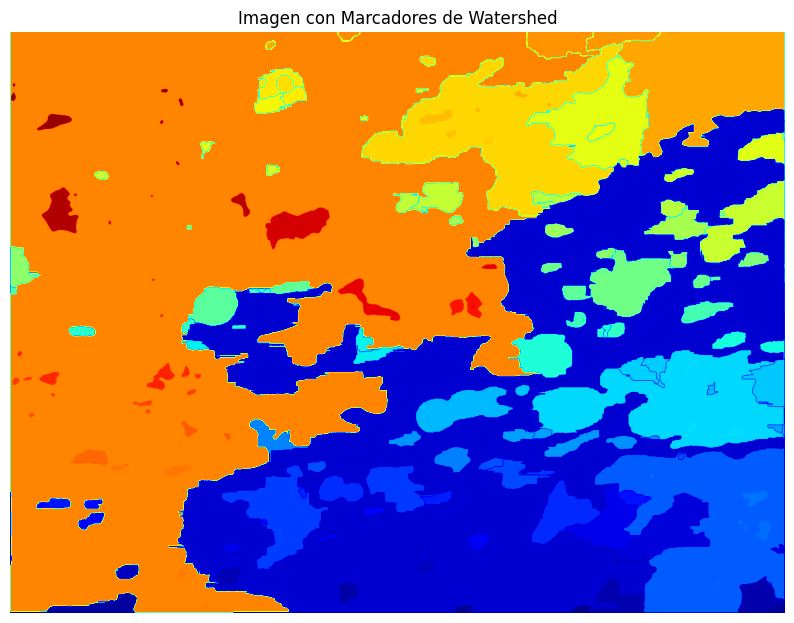

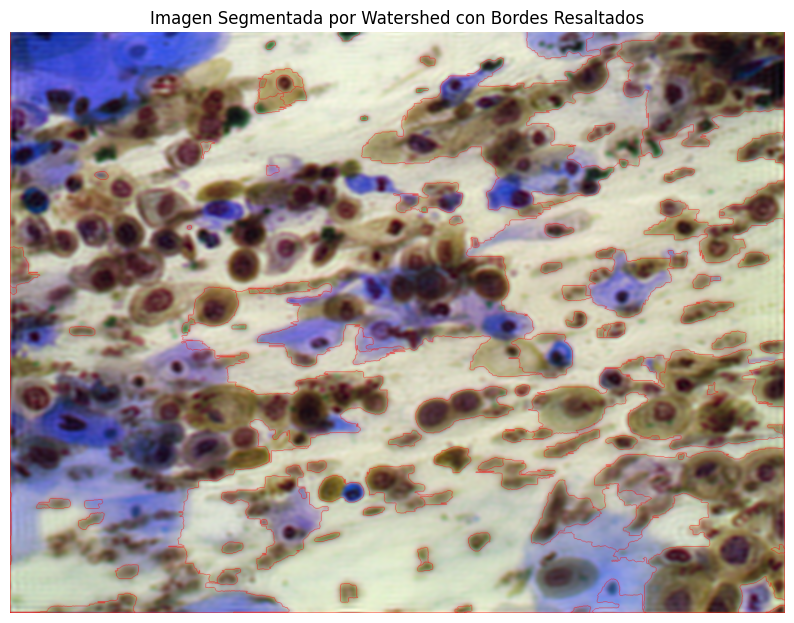

In [62]:
# Convertir la imagen filtrada a escala de grises
gray_filtered_009 = cv2.cvtColor(filtered_image_009, cv2.COLOR_BGR2GRAY)

# Aplicar un filtro de desenfoque gaussiano para reducir el ruido
blurred_009 = cv2.GaussianBlur(gray_filtered_009, (5, 5), 0)

# Realizar una operación de umbralización para segmentar el objeto de interés
ret, thresh_009 = cv2.threshold(blurred_009, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Encontrar los contornos en la imagen binaria
contours_009, hierarchy_009 = cv2.findContours(thresh_009, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Crear una imagen de marcadores para el algoritmo de watershed
markers_009 = np.zeros(gray_filtered_009.shape, dtype=np.int32)
for i in range(len(contours_009)):
    cv2.drawContours(markers_009, contours_009, i, (i + 1), -1)

# Aplicar el algoritmo de watershed
cv2.watershed(filtered_image_009, markers_009)

# Resaltar los bordes de la segmentación en la imagen original
# Define segmented_image_009 here, similar to how it's done for image_008
segmented_image_009 = filtered_image_009.copy()
segmented_image_009[markers_009 == -1] = [0, 0, 255]  # Bordes en rojo


# Mostrar la imagen con los marcadores del watershed
plt.figure(figsize=(10, 10))
plt.imshow(markers_009, cmap='jet')
plt.title('Imagen con Marcadores de Watershed')
plt.axis('off')
plt.show()

# Mostrar la imagen segmentada con los bordes resaltados
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(segmented_image_009, cv2.COLOR_BGR2RGB)) # Now using the defined variable
plt.title('Imagen Segmentada por Watershed con Bordes Resaltados')
plt.axis('off')
plt.show()

###Deteccion de Bordes (Canny)

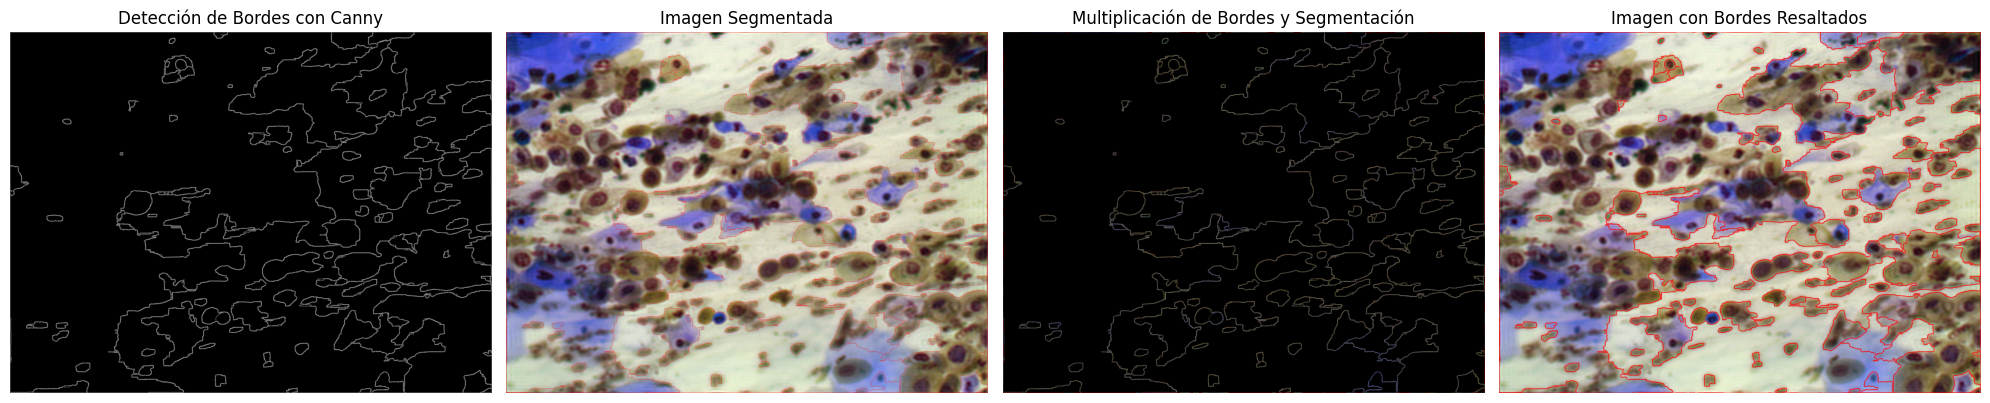

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Aplicar la detección de bordes usando Canny en la imagen segmentada
edges_canny_008 = cv2.Canny(segmented_image_009, 100, 200)

# Convertir edges_canny_008 a 3 canales para combinarla con la imagen original
edges_canny_3ch = cv2.cvtColor(edges_canny_008, cv2.COLOR_GRAY2BGR)

# Realzar los bordes en la imagen original segmentada en color rojo
highlighted_edges = segmented_image_009.copy()
highlighted_edges[edges_canny_008 != 0] = [0, 0, 255]  # Realce en rojo

# Multiplicar la imagen segmentada por la imagen de bordes
multiplication_result = cv2.bitwise_and(segmented_image_009, edges_canny_3ch)

# Crear un plot con la imagen de bordes, la imagen segmentada, la multiplicación y el realce
plt.figure(figsize=(20, 5))

# Imagen de bordes Canny
plt.subplot(1, 4, 1)
plt.imshow(edges_canny_008, cmap='gray')
plt.title('Detección de Bordes con Canny')
plt.axis('off')

# Imagen segmentada
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(segmented_image_009, cv2.COLOR_BGR2RGB))
plt.title('Imagen Segmentada')
plt.axis('off')

# Resultado de la multiplicación
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(multiplication_result, cv2.COLOR_BGR2RGB))
plt.title('Multiplicación de Bordes y Segmentación')
plt.axis('off')

# Imagen original segmentada con bordes resaltados
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(highlighted_edges, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Bordes Resaltados')
plt.axis('off')

# Mostrar el plot
plt.tight_layout()
plt.show()


##Imagen 2

###Transformacion FFT

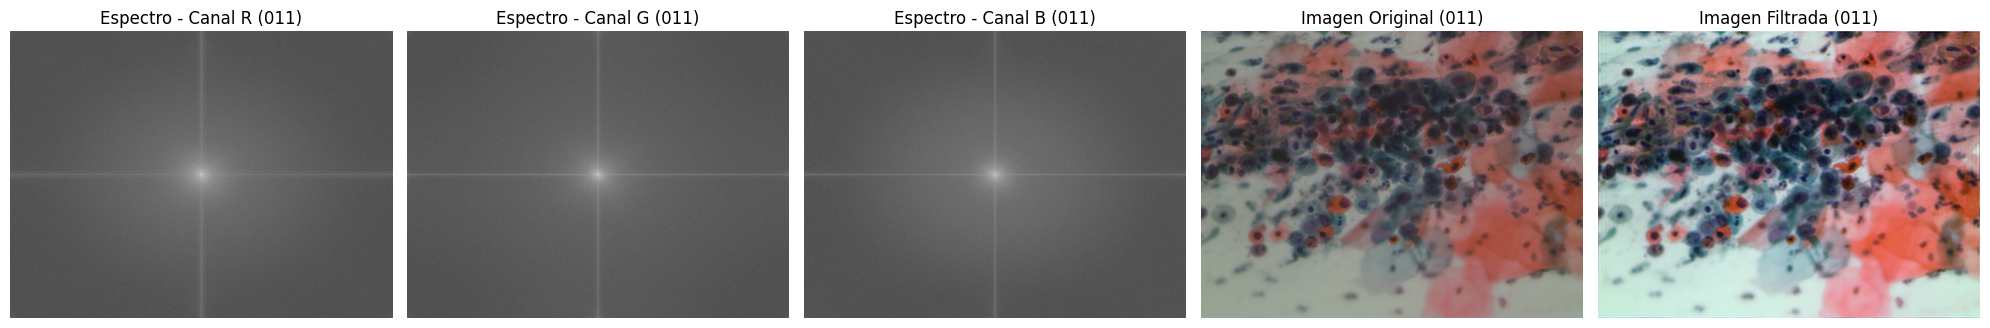

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen desde la nueva ruta proporcionada
image_path = "/content/drive/MyDrive/images bmp/011.bmp"
img = cv2.imread(image_path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separar los canales de color (R, G, B)
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Aplicar la FFT a cada canal de color y desplazar el cero al centro del espectro
r_fft_011 = np.fft.fftshift(np.fft.fft2(r_channel))
g_fft_011 = np.fft.fftshift(np.fft.fft2(g_channel))
b_fft_011 = np.fft.fftshift(np.fft.fft2(b_channel))

# Calcular el espectro de magnitud (logaritmo para mejorar la visualización)
r_magnitude_011 = np.log(np.abs(r_fft_011) + 2)
g_magnitude_011 = np.log(np.abs(g_fft_011) + 2)
b_magnitude_011 = np.log(np.abs(b_fft_011) + 2)

# Crear una máscara de filtro de paso bajo para eliminar el ruido de alta frecuencia
rows, cols = r_channel.shape
crow, ccol = rows // 2, cols // 2
radius = 100  # Radio del filtro de paso bajo

# Crear una máscara circular de paso bajo
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

# Aplicar la máscara al espectro de cada canal
r_fft_filtered_011 = r_fft_011 * mask
g_fft_filtered_011 = g_fft_011 * mask
b_fft_filtered_011 = b_fft_011 * mask

# Calcular la FFT inversa para obtener la imagen filtrada
r_ifft_011 = np.fft.ifft2(np.fft.ifftshift(r_fft_filtered_011)).real
g_ifft_011 = np.fft.ifft2(np.fft.ifftshift(g_fft_filtered_011)).real
b_ifft_011 = np.fft.ifft2(np.fft.ifftshift(b_fft_filtered_011)).real

# Normalizar los canales filtrados para visualización
r_ifft_normalized_011 = cv2.normalize(r_ifft_011, None, 0, 255, cv2.NORM_MINMAX)
g_ifft_normalized_011 = cv2.normalize(g_ifft_011, None, 0, 255, cv2.NORM_MINMAX)
b_ifft_normalized_011 = cv2.normalize(b_ifft_011, None, 0, 255, cv2.NORM_MINMAX)

# Recombinar los canales filtrados para obtener la imagen mejorada
image_filtered_011 = cv2.merge([r_ifft_normalized_011, g_ifft_normalized_011, b_ifft_normalized_011]).astype(np.uint8)

# Guardar la imagen filtrada en una variable para uso posterior
filtered_image_011 = image_filtered_011.copy()

# Mostrar solo los espectros de magnitud, la imagen original y la imagen filtrada
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

# Espectro de magnitud de cada canal
axs[0].imshow(r_magnitude_011, cmap='gray')
axs[0].set_title('Espectro - Canal R (011)')
axs[0].axis('off')

axs[1].imshow(g_magnitude_011, cmap='gray')
axs[1].set_title('Espectro - Canal G (011)')
axs[1].axis('off')

axs[2].imshow(b_magnitude_011, cmap='gray')
axs[2].set_title('Espectro - Canal B (011)')
axs[2].axis('off')

# Imagen original
axs[3].imshow(image_rgb)
axs[3].set_title('Imagen Original (011)')
axs[3].axis('off')

# Imagen filtrada
axs[4].imshow(filtered_image_011)
axs[4].set_title('Imagen Filtrada (011)')
axs[4].axis('off')

plt.tight_layout()
plt.show()


###Watershed

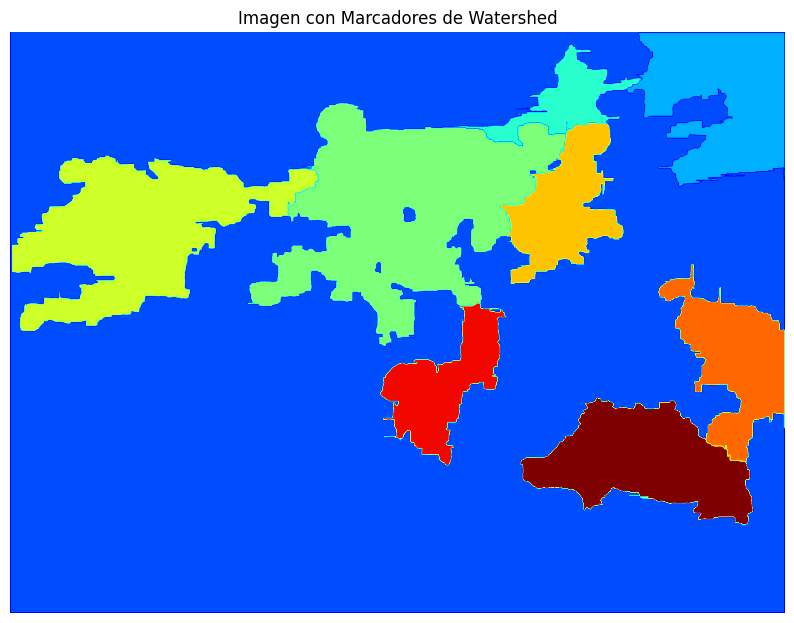

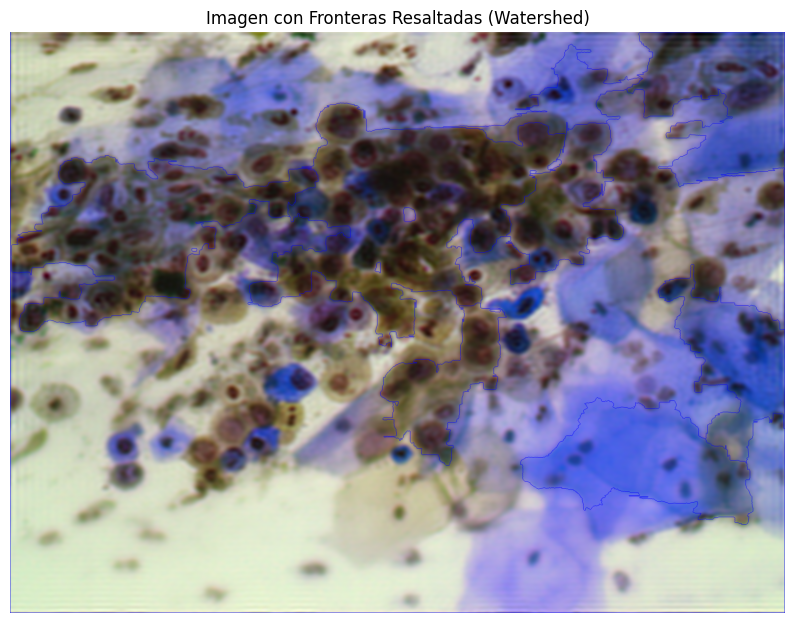

In [65]:
# Convertir la imagen filtrada a escala de grises
gray_filtered_image_011 = cv2.cvtColor(filtered_image_011, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para obtener una imagen binaria
ret, thresh = cv2.threshold(gray_filtered_image_011, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Eliminar ruido con una operación morfológica (apertura)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Encontrar marcadores seguros (background)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Encontrar marcadores seguros (foreground)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convertir a uint8
sure_fg = np.uint8(sure_fg)

# Encontrar la región desconocida
unknown = cv2.subtract(sure_bg, sure_fg)

# Etiquetar marcadores
ret, markers = cv2.connectedComponents(sure_fg)

# Añadir 1 a todos los marcadores para asegurarse de que el fondo es 0, no 1
markers = markers + 1

# Marcar la región desconocida con 0
markers[unknown == 255] = 0

# Aplicar el algoritmo de watershed
markers = cv2.watershed(filtered_image_011, markers)

# Resaltar las fronteras detectadas con un color rojo brillante
filtered_image_011[markers == -1] = [255, 0, 0]  # Bordes en rojo

# Mostrar la imagen con los marcadores del watershed
plt.figure(figsize=(10, 10))
plt.imshow(markers, cmap='jet')
plt.title('Imagen con Marcadores de Watershed')
plt.axis('off')
plt.show()

# Mostrar la imagen con las fronteras resaltadas
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(filtered_image_011, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Fronteras Resaltadas (Watershed)')
plt.axis('off')
plt.show()


###Deteccion de Bordes (Canny)

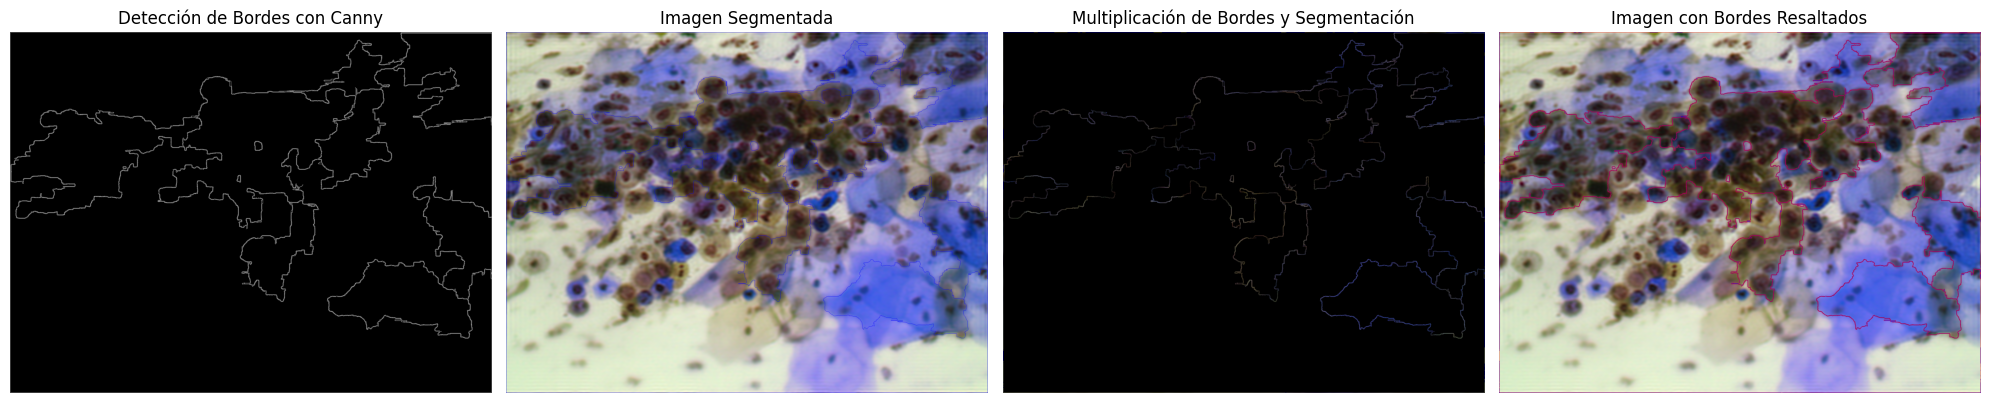

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Aplicar la detección de bordes usando Canny en la imagen segmentada
edges_canny_011 = cv2.Canny(filtered_image_011, 100, 200)

# Convertir edges_canny_011 a 3 canales para combinarla con la imagen original
edges_canny_3ch = cv2.cvtColor(edges_canny_011, cv2.COLOR_GRAY2BGR)

# Realzar los bordes en la imagen original segmentada en color rojo
highlighted_edges = filtered_image_011.copy()
highlighted_edges[edges_canny_011 != 0] = [0, 0, 255]  # Realce en rojo

# Multiplicar la imagen segmentada por la imagen de bordes
multiplication_result = cv2.bitwise_and(filtered_image_011, edges_canny_3ch)

# Crear un plot con la imagen de bordes, la imagen segmentada, la multiplicación y el realce
plt.figure(figsize=(20, 5))

# Imagen de bordes Canny
plt.subplot(1, 4, 1)
plt.imshow(edges_canny_011, cmap='gray')
plt.title('Detección de Bordes con Canny')
plt.axis('off')

# Imagen segmentada
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(filtered_image_011, cv2.COLOR_BGR2RGB))
plt.title('Imagen Segmentada')
plt.axis('off')

# Resultado de la multiplicación
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(multiplication_result, cv2.COLOR_BGR2RGB))
plt.title('Multiplicación de Bordes y Segmentación')
plt.axis('off')

# Imagen original segmentada con bordes resaltados
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(highlighted_edges, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Bordes Resaltados')
plt.axis('off')

# Mostrar el plot
plt.tight_layout()
plt.show()


#Células Koilocíticas

##Imagen 1

###Transformacion FFT

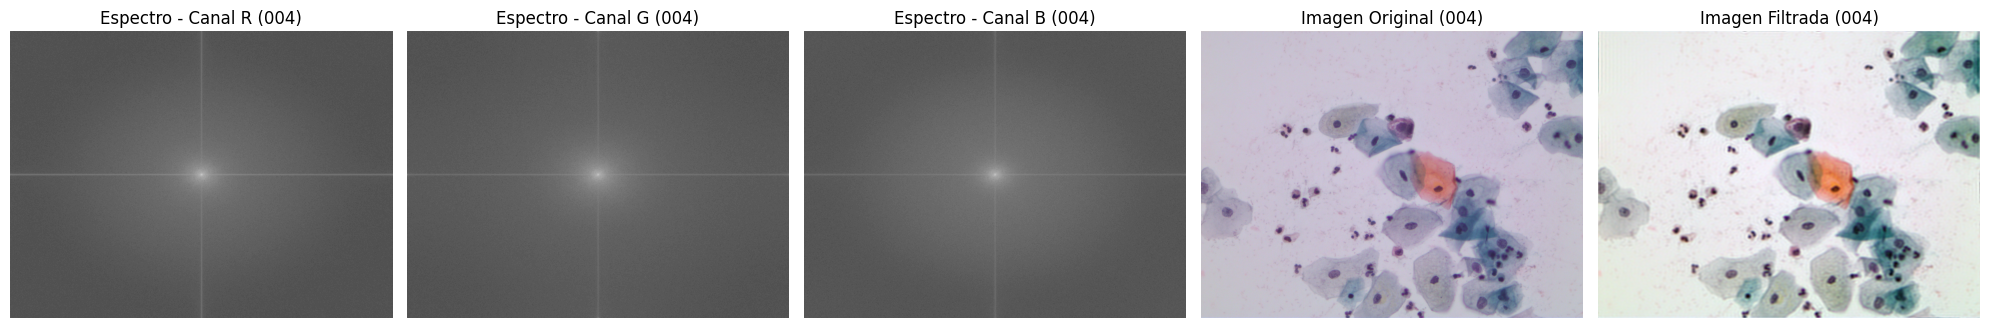

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen desde la nueva ruta proporcionada
image_path = "/content/drive/MyDrive/images bmp/004.bmp"
img = cv2.imread(image_path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separar los canales de color (R, G, B)
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Aplicar la FFT a cada canal de color y desplazar el cero al centro del espectro
r_fft_004 = np.fft.fftshift(np.fft.fft2(r_channel))
g_fft_004 = np.fft.fftshift(np.fft.fft2(g_channel))
b_fft_004 = np.fft.fftshift(np.fft.fft2(b_channel))

# Calcular el espectro de magnitud (logaritmo para mejorar la visualización)
r_magnitude_004 = np.log(np.abs(r_fft_004) + 2)
g_magnitude_004 = np.log(np.abs(g_fft_004) + 2)
b_magnitude_004 = np.log(np.abs(b_fft_004) + 2)

# Crear una máscara de filtro de paso bajo para eliminar el ruido de alta frecuencia
rows, cols = r_channel.shape
crow, ccol = rows // 2, cols // 2
radius = 100  # Radio del filtro de paso bajo

# Crear una máscara circular de paso bajo
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

# Aplicar la máscara al espectro de cada canal
r_fft_filtered_004 = r_fft_004 * mask
g_fft_filtered_004 = g_fft_004 * mask
b_fft_filtered_004 = b_fft_004 * mask

# Calcular la FFT inversa para obtener la imagen filtrada
r_ifft_004 = np.fft.ifft2(np.fft.ifftshift(r_fft_filtered_004)).real
g_ifft_004 = np.fft.ifft2(np.fft.ifftshift(g_fft_filtered_004)).real
b_ifft_004 = np.fft.ifft2(np.fft.ifftshift(b_fft_filtered_004)).real

# Normalizar los canales filtrados para visualización
r_ifft_normalized_004 = cv2.normalize(r_ifft_004, None, 0, 255, cv2.NORM_MINMAX)
g_ifft_normalized_004 = cv2.normalize(g_ifft_004, None, 0, 255, cv2.NORM_MINMAX)
b_ifft_normalized_004 = cv2.normalize(b_ifft_004, None, 0, 255, cv2.NORM_MINMAX)

# Recombinar los canales filtrados para obtener la imagen mejorada
image_filtered_004 = cv2.merge([r_ifft_normalized_004, g_ifft_normalized_004, b_ifft_normalized_004]).astype(np.uint8)

# Guardar la imagen filtrada en una variable para uso posterior
filtered_image_004 = image_filtered_004.copy()

# Mostrar solo los espectros de magnitud, la imagen original y la imagen filtrada
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

# Espectro de magnitud de cada canal
axs[0].imshow(r_magnitude_004, cmap='gray')
axs[0].set_title('Espectro - Canal R (004)')
axs[0].axis('off')

axs[1].imshow(g_magnitude_004, cmap='gray')
axs[1].set_title('Espectro - Canal G (004)')
axs[1].axis('off')

axs[2].imshow(b_magnitude_004, cmap='gray')
axs[2].set_title('Espectro - Canal B (004)')
axs[2].axis('off')

# Imagen original
axs[3].imshow(image_rgb)
axs[3].set_title('Imagen Original (004)')
axs[3].axis('off')

# Imagen filtrada
axs[4].imshow(filtered_image_004)
axs[4].set_title('Imagen Filtrada (004)')
axs[4].axis('off')

plt.tight_layout()
plt.show()


###Watershed

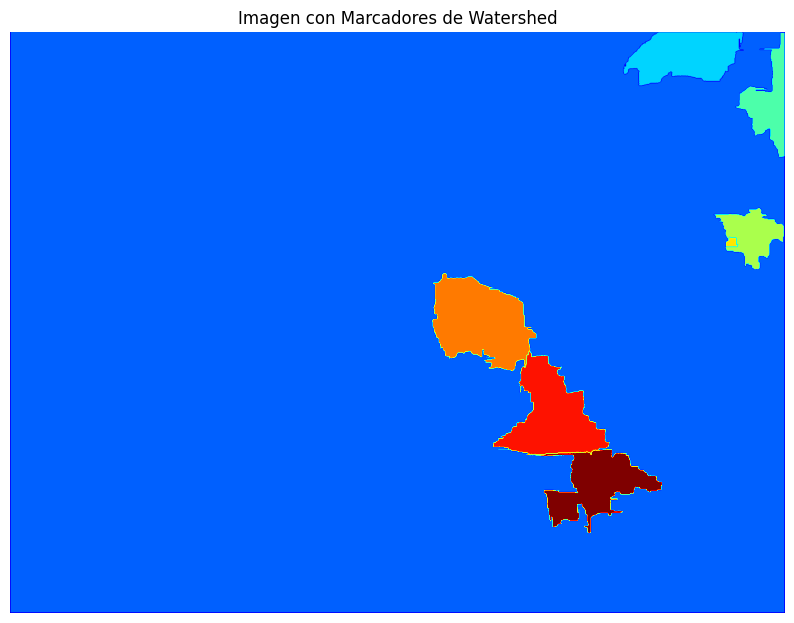

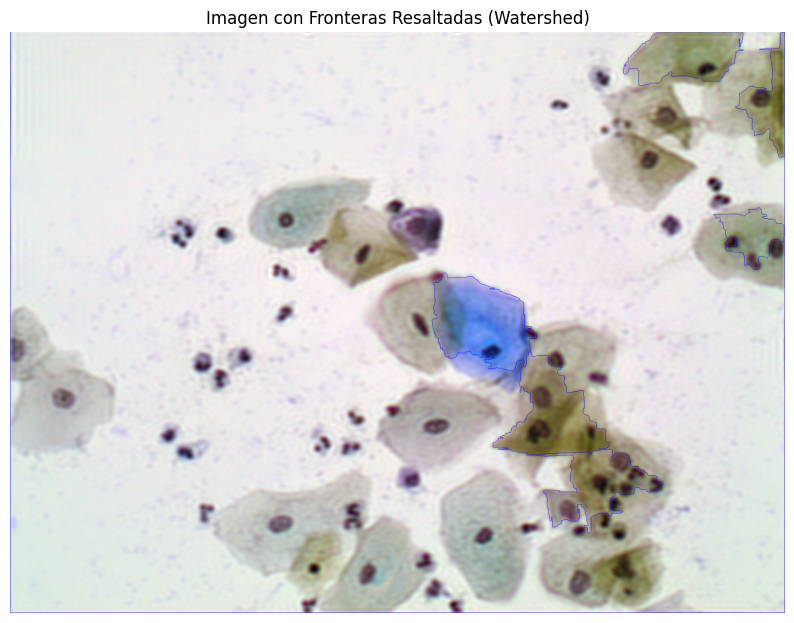

In [68]:
# Convertir la imagen filtrada a escala de grises
gray_filtered_image_004 = cv2.cvtColor(filtered_image_004, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para obtener una imagen binaria
ret, thresh = cv2.threshold(gray_filtered_image_004, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Eliminar ruido con una operación morfológica (apertura)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Encontrar marcadores seguros (background)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Encontrar marcadores seguros (foreground)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convertir a uint8
sure_fg = np.uint8(sure_fg)

# Encontrar la región desconocida
unknown = cv2.subtract(sure_bg, sure_fg)

# Etiquetar marcadores
ret, markers = cv2.connectedComponents(sure_fg)

# Añadir 1 a todos los marcadores para asegurarse de que el fondo es 0, no 1
markers = markers + 1

# Marcar la región desconocida con 0
markers[unknown == 255] = 0

# Aplicar el algoritmo de watershed
markers = cv2.watershed(filtered_image_004, markers)

# Resaltar las fronteras detectadas con un color rojo brillante
filtered_image_004[markers == -1] = [255, 0, 0]  # Bordes en rojo

# Mostrar la imagen con los marcadores del watershed
plt.figure(figsize=(10, 10))
plt.imshow(markers, cmap='jet')
plt.title('Imagen con Marcadores de Watershed')
plt.axis('off')
plt.show()

# Mostrar la imagen con las fronteras resaltadas
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(filtered_image_004, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Fronteras Resaltadas (Watershed)')
plt.axis('off')
plt.show()

###Deteccion de Bordes (Canny)

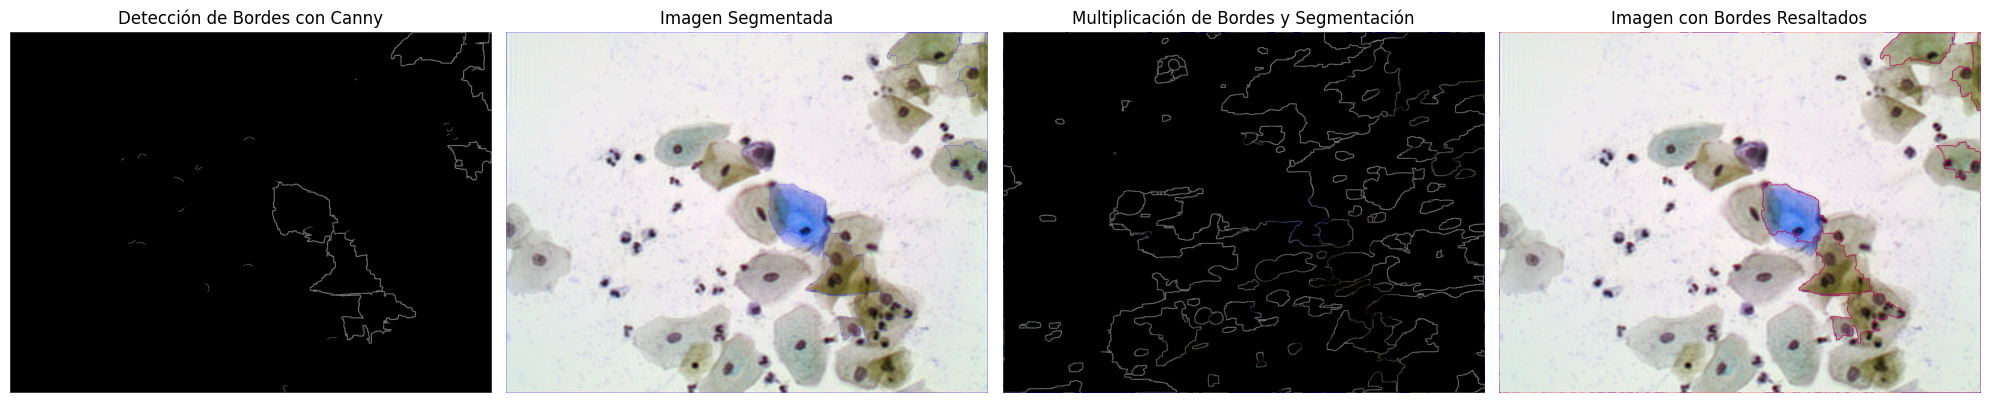

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Aplicar la detección de bordes usando Canny en la imagen segmentada
edges_canny_004 = cv2.Canny(filtered_image_004, 100, 200)

# Convertir edges_canny_004 a 3 canales para combinarla con la imagen original
edges_canny_3ch = cv2.cvtColor(edges_canny_008, cv2.COLOR_GRAY2BGR)

# Realzar los bordes en la imagen original segmentada en color rojo
highlighted_edges = filtered_image_004.copy()
highlighted_edges[edges_canny_004 != 0] = [0, 0, 255]  # Realce en rojo

# Multiplicar la imagen segmentada por la imagen de bordes
multiplication_result = cv2.bitwise_and(filtered_image_004, edges_canny_3ch)

# Crear un plot con la imagen de bordes, la imagen segmentada, la multiplicación y el realce
plt.figure(figsize=(20, 5))

# Imagen de bordes Canny
plt.subplot(1, 4, 1)
plt.imshow(edges_canny_004, cmap='gray')
plt.title('Detección de Bordes con Canny')
plt.axis('off')

# Imagen segmentada
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(filtered_image_004, cv2.COLOR_BGR2RGB))
plt.title('Imagen Segmentada')
plt.axis('off')

# Resultado de la multiplicación
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(multiplication_result, cv2.COLOR_BGR2RGB))
plt.title('Multiplicación de Bordes y Segmentación')
plt.axis('off')

# Imagen original segmentada con bordes resaltados
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(highlighted_edges, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Bordes Resaltados')
plt.axis('off')

# Mostrar el plot
plt.tight_layout()
plt.show()

##Imagen 2

###Transformacion FFT

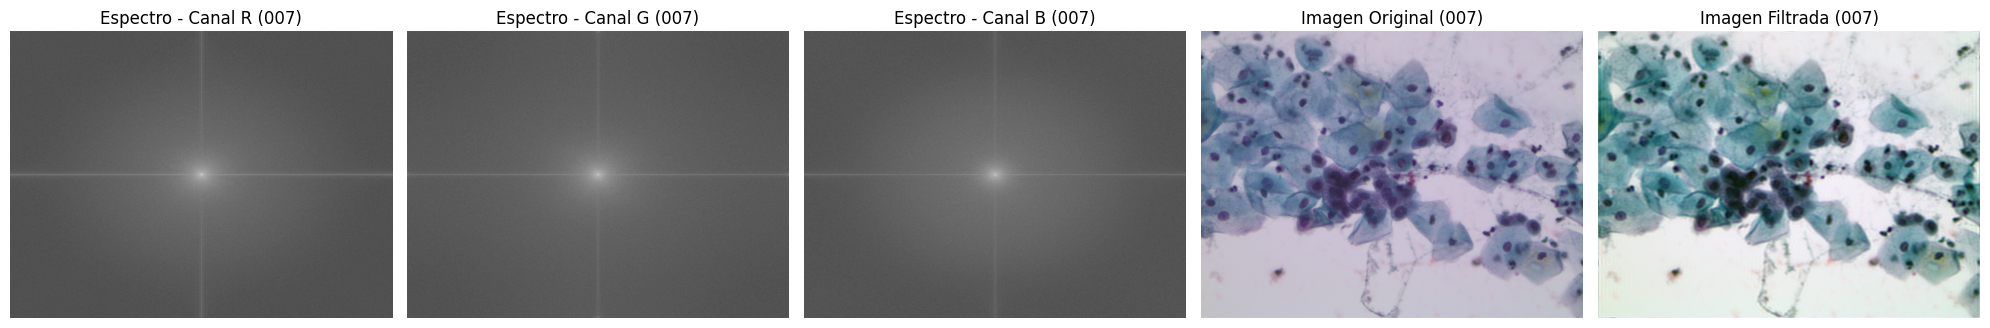

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen desde la nueva ruta proporcionada
image_path = "/content/drive/MyDrive/images bmp/007.bmp"
img = cv2.imread(image_path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separar los canales de color (R, G, B)
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Aplicar la FFT a cada canal de color y desplazar el cero al centro del espectro
r_fft_007 = np.fft.fftshift(np.fft.fft2(r_channel))
g_fft_007 = np.fft.fftshift(np.fft.fft2(g_channel))
b_fft_007 = np.fft.fftshift(np.fft.fft2(b_channel))

# Calcular el espectro de magnitud (logaritmo para mejorar la visualización)
r_magnitude_007 = np.log(np.abs(r_fft_007) + 2)
g_magnitude_007 = np.log(np.abs(g_fft_007) + 2)
b_magnitude_007 = np.log(np.abs(b_fft_007) + 2)

# Crear una máscara de filtro de paso bajo para eliminar el ruido de alta frecuencia
rows, cols = r_channel.shape
crow, ccol = rows // 2, cols // 2
radius = 100  # Radio del filtro de paso bajo

# Crear una máscara circular de paso bajo
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

# Aplicar la máscara al espectro de cada canal
r_fft_filtered_007 = r_fft_007 * mask
g_fft_filtered_007 = g_fft_007 * mask
b_fft_filtered_007 = b_fft_007 * mask

# Calcular la FFT inversa para obtener la imagen filtrada
r_ifft_007 = np.fft.ifft2(np.fft.ifftshift(r_fft_filtered_007)).real
g_ifft_007 = np.fft.ifft2(np.fft.ifftshift(g_fft_filtered_007)).real
b_ifft_007 = np.fft.ifft2(np.fft.ifftshift(b_fft_filtered_007)).real

# Normalizar los canales filtrados para visualización
r_ifft_normalized_007 = cv2.normalize(r_ifft_007, None, 0, 255, cv2.NORM_MINMAX)
g_ifft_normalized_007 = cv2.normalize(g_ifft_007, None, 0, 255, cv2.NORM_MINMAX)
b_ifft_normalized_007 = cv2.normalize(b_ifft_007, None, 0, 255, cv2.NORM_MINMAX)

# Recombinar los canales filtrados para obtener la imagen mejorada
image_filtered_007 = cv2.merge([r_ifft_normalized_007, g_ifft_normalized_007, b_ifft_normalized_007]).astype(np.uint8)

# Guardar la imagen filtrada en una variable para uso posterior
filtered_image_007 = image_filtered_007.copy()

# Mostrar solo los espectros de magnitud, la imagen original y la imagen filtrada
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

# Espectro de magnitud de cada canal
axs[0].imshow(r_magnitude_007, cmap='gray')
axs[0].set_title('Espectro - Canal R (007)')
axs[0].axis('off')

axs[1].imshow(g_magnitude_007, cmap='gray')
axs[1].set_title('Espectro - Canal G (007)')
axs[1].axis('off')

axs[2].imshow(b_magnitude_007, cmap='gray')
axs[2].set_title('Espectro - Canal B (007)')
axs[2].axis('off')

# Imagen original
axs[3].imshow(image_rgb)
axs[3].set_title('Imagen Original (007)')
axs[3].axis('off')

# Imagen filtrada
axs[4].imshow(filtered_image_007)
axs[4].set_title('Imagen Filtrada (007)')
axs[4].axis('off')

plt.tight_layout()
plt.show()


###Watershed

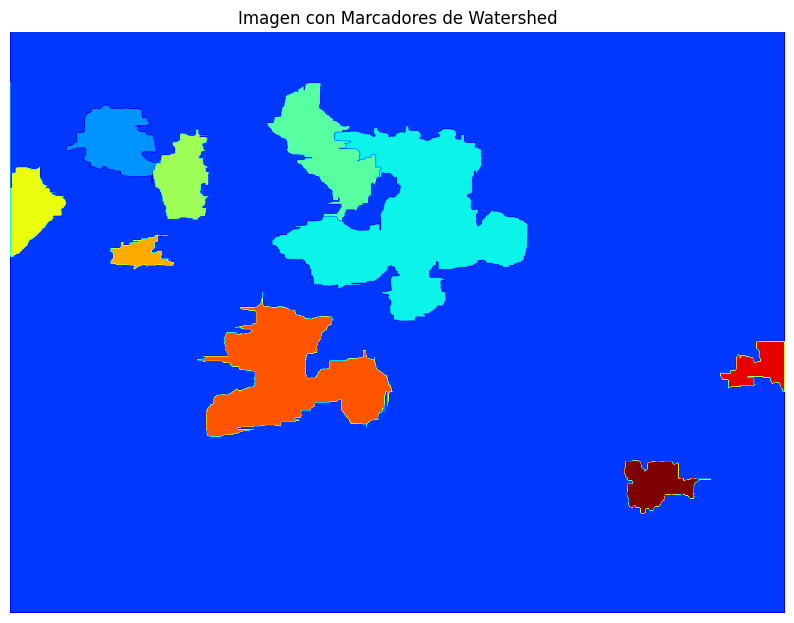

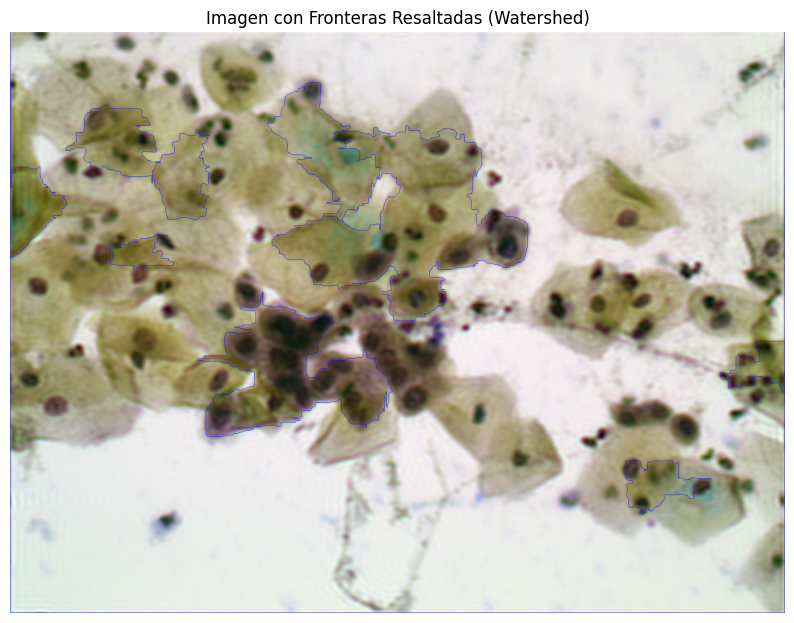

In [71]:
# Convertir la imagen filtrada a escala de grises
gray_filtered_image_007 = cv2.cvtColor(filtered_image_007, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para obtener una imagen binaria
ret, thresh = cv2.threshold(gray_filtered_image_007, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Eliminar ruido con una operación morfológica (apertura)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Encontrar marcadores seguros (background)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Encontrar marcadores seguros (foreground)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convertir a uint8
sure_fg = np.uint8(sure_fg)

# Encontrar la región desconocida
unknown = cv2.subtract(sure_bg, sure_fg)

# Etiquetar marcadores
ret, markers = cv2.connectedComponents(sure_fg)

# Añadir 1 a todos los marcadores para asegurarse de que el fondo es 0, no 1
markers = markers + 1

# Marcar la región desconocida con 0
markers[unknown == 255] = 0

# Aplicar el algoritmo de watershed
markers = cv2.watershed(filtered_image_007, markers)

# Resaltar las fronteras detectadas con un color rojo brillante
filtered_image_007[markers == -1] = [255, 0, 0]  # Bordes en rojo

# Mostrar la imagen con los marcadores del watershed
plt.figure(figsize=(10, 10))
plt.imshow(markers, cmap='jet')
plt.title('Imagen con Marcadores de Watershed')
plt.axis('off')
plt.show()

# Mostrar la imagen con las fronteras resaltadas
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(filtered_image_007, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Fronteras Resaltadas (Watershed)')
plt.axis('off')
plt.show()

###Deteccion de Bordes (Canny)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Aplicar la detección de bordes usando Canny en la imagen segmentada
edges_canny_007 = cv2.Canny(filtered_image_007, 100, 200)

# Convertir edges_canny_007 a 3 canales para combinarla con la imagen original
edges_canny_3ch = cv2.cvtColor(edges_canny_007, cv2.COLOR_GRAY2BGR)

# Realzar los bordes en la imagen original segmentada en color rojo
highlighted_edges = filtered_image_007.copy()
highlighted_edges[edges_canny_007 != 0] = [0, 0, 255]  # Realce en rojo

# Multiplicar la imagen segmentada por la imagen de bordes
multiplication_result = cv2.bitwise_and(filtered_image_007, edges_canny_3ch)

# Crear un plot con la imagen de bordes, la imagen segmentada, la multiplicación y el realce
plt.figure(figsize=(20, 5))

# Imagen de bordes Canny
plt.subplot(1, 4, 1)
plt.imshow(edges_canny_007, cmap='gray')
plt.title('Detección de Bordes con Canny')
plt.axis('off')

# Imagen segmentada
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(filtered_image_007, cv2.COLOR_BGR2RGB))
plt.title('Imagen Segmentada')
plt.axis('off')

# Resultado de la multiplicación
# Resultado de la multiplicación
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(multiplication_result, cv2.COLOR_BGR2RGB))
plt.title('Multiplicación de Bordes y Segmentación')
plt.axis('off')

# Imagen original segmentada con bordes resaltados
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(highlighted_edges, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Bordes Resaltados')
plt.axis('off')

# Mostrar el plot
plt.tight_layout()
plt.show()

#Células Metaplásticas

##Imagen 1

###Transformacion FFT

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen desde la nueva ruta proporcionada
image_path = "/content/drive/MyDrive/images bmp/007(1).bmp"
img = cv2.imread(image_path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separar los canales de color (R, G, B)
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Aplicar la FFT a cada canal de color y desplazar el cero al centro del espectro
r_fft_007_1 = np.fft.fftshift(np.fft.fft2(r_channel))
g_fft_007_1 = np.fft.fftshift(np.fft.fft2(g_channel))
b_fft_007_1 = np.fft.fftshift(np.fft.fft2(b_channel))

# Calcular el espectro de magnitud (logaritmo para mejorar la visualización)
r_magnitude_007_1 = np.log(np.abs(r_fft_007_1) + 2)
g_magnitude_007_1 = np.log(np.abs(g_fft_007_1) + 2)
b_magnitude_007_1 = np.log(np.abs(b_fft_007_1) + 2)

# Crear una máscara de filtro de paso bajo para eliminar el ruido de alta frecuencia
rows, cols = r_channel.shape
crow, ccol = rows // 2, cols // 2
radius = 100  # Radio del filtro de paso bajo

# Crear una máscara circular de paso bajo
mask_007_1 = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_007_1, (ccol, crow), radius, 1, thickness=-1)

# Aplicar la máscara al espectro de cada canal
r_fft_filtered_007_1 = r_fft_007_1 * mask_007_1
g_fft_filtered_007_1 = g_fft_007_1 * mask_007_1
b_fft_filtered_007_1 = b_fft_007_1 * mask_007_1

# Calcular la FFT inversa para obtener la imagen filtrada
r_ifft_007_1 = np.fft.ifft2(np.fft.ifftshift(r_fft_filtered_007_1)).real
g_ifft_007_1 = np.fft.ifft2(np.fft.ifftshift(g_fft_filtered_007_1)).real
b_ifft_007_1 = np.fft.ifft2(np.fft.ifftshift(b_fft_filtered_007_1)).real

# Normalizar los canales filtrados para visualización
r_ifft_normalized_007_1 = cv2.normalize(r_ifft_007_1, None, 0, 255, cv2.NORM_MINMAX)
g_ifft_normalized_007_1 = cv2.normalize(g_ifft_007_1, None, 0, 255, cv2.NORM_MINMAX)
b_ifft_normalized_007_1 = cv2.normalize(b_ifft_007_1, None, 0, 255, cv2.NORM_MINMAX)

# Recombinar los canales filtrados para obtener la imagen mejorada
image_filtered_007_1 = cv2.merge([r_ifft_normalized_007_1, g_ifft_normalized_007_1, b_ifft_normalized_007_1]).astype(np.uint8)

# Guardar la imagen filtrada en una variable para uso posterior
filtered_image_007_1 = image_filtered_007_1.copy()

# Mostrar solo los espectros de magnitud, la imagen original y la imagen filtrada
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

# Espectro de magnitud de cada canal
axs[0].imshow(r_magnitude_007_1, cmap='gray')
axs[0].set_title('Espectro - Canal R (007_1)')
axs[0].axis('off')

axs[1].imshow(g_magnitude_007_1, cmap='gray')
axs[1].set_title('Espectro - Canal G (007_1)')
axs[1].axis('off')

axs[2].imshow(b_magnitude_007_1, cmap='gray')
axs[2].set_title('Espectro - Canal B (007_1)')
axs[2].axis('off')

# Imagen original
axs[3].imshow(image_rgb)
axs[3].set_title('Imagen Original (007_1)')
axs[3].axis('off')

# Imagen filtrada
axs[4].imshow(filtered_image_007_1)
axs[4].set_title('Imagen Filtrada (007_1)')
axs[4].axis('off')

plt.tight_layout()
plt.show()



###Watershed

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convertir la imagen filtrada a escala de grises
gray_filtered_image_007_1 = cv2.cvtColor(filtered_image_007_1, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para obtener una imagen binaria
ret, thresh = cv2.threshold(gray_filtered_image_007_1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Eliminar ruido con una operación morfológica (apertura)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Encontrar marcadores seguros (background)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Encontrar marcadores seguros (foreground)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convertir a uint8
sure_fg = np.uint8(sure_fg)

# Encontrar la región desconocida
unknown = cv2.subtract(sure_bg, sure_fg)

# Etiquetar marcadores
ret, markers = cv2.connectedComponents(sure_fg)

# Añadir 1 a todos los marcadores para asegurarse de que el fondo es 0, no 1
markers = markers + 1

# Marcar la región desconocida con 0
markers[unknown == 255] = 0

# Aplicar el algoritmo de watershed
markers = cv2.watershed(filtered_image_007_1, markers)

# Resaltar las fronteras detectadas con un color rojo brillante
filtered_image_007_1[markers == -1] = [255, 0, 0]  # Bordes en rojo

# Mostrar la imagen con los marcadores del watershed
plt.figure(figsize=(10, 10))
plt.imshow(markers, cmap='jet')
plt.title('Imagen con Marcadores de Watershed')
plt.axis('off')
plt.show()

# Mostrar la imagen con las fronteras resaltadas
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(filtered_image_007_1, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Fronteras Resaltadas (Watershed)')
plt.axis('off')
plt.show()


###Deteccion de Bordes (Canny)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Aplicar la detección de bordes usando Canny en la imagen segmentada
edges_canny_007_1 = cv2.Canny(filtered_image_007_1, 100, 200)

# Convertir edges_canny_007_1 a 3 canales para combinarla con la imagen original
edges_canny_3ch = cv2.cvtColor(edges_canny_007_1, cv2.COLOR_GRAY2BGR)

# Realzar los bordes en la imagen original segmentada en color rojo
highlighted_edges = filtered_image_007_1.copy()
highlighted_edges[edges_canny_007_1 != 0] = [0, 0, 255]  # Realce en rojo

# Multiplicar la imagen segmentada por la imagen de bordes
multiplication_result = cv2.bitwise_and(filtered_image_007_1, edges_canny_3ch)

# Crear un plot con la imagen de bordes, la imagen segmentada, la multiplicación y el realce
plt.figure(figsize=(20, 5))

# Imagen de bordes Canny
plt.subplot(1, 4, 1)
plt.imshow(edges_canny_007_1, cmap='gray')
plt.title('Detección de Bordes con Canny')
plt.axis('off')

# Imagen segmentada
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(filtered_image_007_1, cv2.COLOR_BGR2RGB))
plt.title('Imagen Segmentada')
plt.axis('off')

# Resultado de la multiplicación
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(multiplication_result, cv2.COLOR_BGR2RGB))
plt.title('Multiplicación de Bordes y Segmentación')
plt.axis('off')

# Imagen original segmentada con bordes resaltados
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(highlighted_edges, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Bordes Resaltados')
plt.axis('off')

# Mostrar el plot
plt.tight_layout()
plt.show()


##Imagen 2

###Transformacion FFT

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen desde la nueva ruta proporcionada
image_path = "/content/drive/MyDrive/images bmp/026.bmp"
img = cv2.imread(image_path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separar los canales de color (R, G, B)
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Aplicar la FFT a cada canal de color y desplazar el cero al centro del espectro
r_fft_026 = np.fft.fftshift(np.fft.fft2(r_channel))
g_fft_026 = np.fft.fftshift(np.fft.fft2(g_channel))
b_fft_026 = np.fft.fftshift(np.fft.fft2(b_channel))

# Calcular el espectro de magnitud (logaritmo para mejorar la visualización)
r_magnitude_026 = np.log(np.abs(r_fft_026) + 2)
g_magnitude_026 = np.log(np.abs(g_fft_026) + 2)
b_magnitude_026 = np.log(np.abs(b_fft_026) + 2)

# Crear una máscara de filtro de paso bajo para eliminar el ruido de alta frecuencia
rows, cols = r_channel.shape
crow, ccol = rows // 2, cols // 2
radius = 100  # Radio del filtro de paso bajo

# Crear una máscara circular de paso bajo
mask_026 = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_026, (ccol, crow), radius, 1, thickness=-1)

# Aplicar la máscara al espectro de cada canal
r_fft_filtered_026 = r_fft_026 * mask_026
g_fft_filtered_026 = g_fft_026 * mask_026
b_fft_filtered_026 = b_fft_026 * mask_026

# Calcular la FFT inversa para obtener la imagen filtrada
r_ifft_026 = np.fft.ifft2(np.fft.ifftshift(r_fft_filtered_026)).real
g_ifft_026 = np.fft.ifft2(np.fft.ifftshift(g_fft_filtered_026)).real
b_ifft_026 = np.fft.ifft2(np.fft.ifftshift(b_fft_filtered_026)).real

# Normalizar los canales filtrados para visualización
r_ifft_normalized_026 = cv2.normalize(r_ifft_026, None, 0, 255, cv2.NORM_MINMAX)
g_ifft_normalized_026 = cv2.normalize(g_ifft_026, None, 0, 255, cv2.NORM_MINMAX)
b_ifft_normalized_026 = cv2.normalize(b_ifft_026, None, 0, 255, cv2.NORM_MINMAX)

# Recombinar los canales filtrados para obtener la imagen mejorada
image_filtered_026 = cv2.merge([r_ifft_normalized_026, g_ifft_normalized_026, b_ifft_normalized_026]).astype(np.uint8)

# Guardar la imagen filtrada en una variable para uso posterior
filtered_image_026 = image_filtered_026.copy()

# Mostrar solo los espectros de magnitud, la imagen original y la imagen filtrada
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

# Espectro de magnitud de cada canal
axs[0].imshow(r_magnitude_026, cmap='gray')
axs[0].set_title('Espectro - Canal R (026)')
axs[0].axis('off')

axs[1].imshow(g_magnitude_026, cmap='gray')
axs[1].set_title('Espectro - Canal G (026)')
axs[1].axis('off')

axs[2].imshow(b_magnitude_026, cmap='gray')
axs[2].set_title('Espectro - Canal B (026)')
axs[2].axis('off')

# Imagen original
axs[3].imshow(image_rgb)
axs[3].set_title('Imagen Original (026)')
axs[3].axis('off')

# Imagen filtrada
axs[4].imshow(filtered_image_026)
axs[4].set_title('Imagen Filtrada (026)')
axs[4].axis('off')

plt.tight_layout()
plt.show()



###Watershed

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convertir la imagen filtrada a escala de grises
gray_filtered_image_026 = cv2.cvtColor(filtered_image_026, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para obtener una imagen binaria
ret, thresh = cv2.threshold(gray_filtered_image_026, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Eliminar ruido con una operación morfológica (apertura)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Encontrar marcadores seguros (background)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Encontrar marcadores seguros (foreground)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convertir a uint8
sure_fg = np.uint8(sure_fg)

# Encontrar la región desconocida
unknown = cv2.subtract(sure_bg, sure_fg)

# Etiquetar marcadores
ret, markers = cv2.connectedComponents(sure_fg)

# Añadir 1 a todos los marcadores para asegurarse de que el fondo es 0, no 1
markers = markers + 1

# Marcar la región desconocida con 0
markers[unknown == 255] = 0

# Aplicar el algoritmo de watershed
markers = cv2.watershed(filtered_image_026, markers)

# Resaltar las fronteras detectadas con un color rojo brillante
filtered_image_026[markers == -1] = [255, 0, 0]  # Bordes en rojo

# Mostrar la imagen con los marcadores del watershed
plt.figure(figsize=(10, 10))
plt.imshow(markers, cmap='jet')
plt.title('Imagen con Marcadores de Watershed')
plt.axis('off')
plt.show()

# Mostrar la imagen con las fronteras resaltadas
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(filtered_image_026, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Fronteras Resaltadas (Watershed)')
plt.axis('off')
plt.show()


###Deteccion de Bordes (Canny)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Aplicar la detección de bordes usando Canny en la imagen segmentada
edges_canny_026 = cv2.Canny(filtered_image_026, 100, 200)

# Convertir edges_canny_026 a 3 canales para combinarla con la imagen original
edges_canny_3ch = cv2.cvtColor(edges_canny_026, cv2.COLOR_GRAY2BGR)

# Realzar los bordes en la imagen original segmentada en color rojo
highlighted_edges = filtered_image_026.copy()
highlighted_edges[edges_canny_026 != 0] = [0, 0, 255]  # Realce en rojo

# Multiplicar la imagen segmentada por la imagen de bordes
multiplication_result = cv2.bitwise_and(filtered_image_026, edges_canny_3ch)

# Crear un plot con la imagen de bordes, la imagen segmentada, la multiplicación y el realce
plt.figure(figsize=(20, 5))

# Imagen de bordes Canny
plt.subplot(1, 4, 1)
plt.imshow(edges_canny_026, cmap='gray')
plt.title('Detección de Bordes con Canny')
plt.axis('off')

# Imagen segmentada
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(filtered_image_026, cv2.COLOR_BGR2RGB))
plt.title('Imagen Segmentada')
plt.axis('off')

# Resultado de la multiplicación
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(multiplication_result, cv2.COLOR_BGR2RGB))
plt.title('Multiplicación de Bordes y Segmentación')
plt.axis('off')

# Imagen original segmentada con bordes resaltados
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(highlighted_edges, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Bordes Resaltados')
plt.axis('off')

# Mostrar el plot
plt.tight_layout()
plt.show()


#Células Parabasales

##Imagen 1

###Transformacion FFT

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen desde la nueva ruta proporcionada
image_path = "/content/drive/MyDrive/images bmp/005(1).bmp"
img = cv2.imread(image_path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separar los canales de color (R, G, B)
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Aplicar la FFT a cada canal de color y desplazar el cero al centro del espectro
r_fft_005_1 = np.fft.fftshift(np.fft.fft2(r_channel))
g_fft_005_1 = np.fft.fftshift(np.fft.fft2(g_channel))
b_fft_005_1 = np.fft.fftshift(np.fft.fft2(b_channel))

# Calcular el espectro de magnitud (logaritmo para mejorar la visualización)
r_magnitude_005_1 = np.log(np.abs(r_fft_005_1) + 2)
g_magnitude_005_1 = np.log(np.abs(g_fft_005_1) + 2)
b_magnitude_005_1 = np.log(np.abs(b_fft_005_1) + 2)

# Crear una máscara de filtro de paso bajo para eliminar el ruido de alta frecuencia
rows, cols = r_channel.shape
crow, ccol = rows // 2, cols // 2
radius = 100  # Radio del filtro de paso bajo

# Crear una máscara circular de paso bajo
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

# Aplicar la máscara al espectro de cada canal
r_fft_filtered_005_1 = r_fft_005_1 * mask
g_fft_filtered_005_1 = g_fft_005_1 * mask
b_fft_filtered_005_1 = b_fft_005_1 * mask

# Calcular la FFT inversa para obtener la imagen filtrada
r_ifft_005_1 = np.fft.ifft2(np.fft.ifftshift(r_fft_filtered_005_1)).real
g_ifft_005_1 = np.fft.ifft2(np.fft.ifftshift(g_fft_filtered_005_1)).real
b_ifft_005_1 = np.fft.ifft2(np.fft.ifftshift(b_fft_filtered_005_1)).real

# Normalizar los canales filtrados para visualización
r_ifft_normalized_005_1 = cv2.normalize(r_ifft_005_1, None, 0, 255, cv2.NORM_MINMAX)
g_ifft_normalized_005_1 = cv2.normalize(g_ifft_005_1, None, 0, 255, cv2.NORM_MINMAX)
b_ifft_normalized_005_1 = cv2.normalize(b_ifft_005_1, None, 0, 255, cv2.NORM_MINMAX)

# Recombinar los canales filtrados para obtener la imagen mejorada
image_filtered_005_1 = cv2.merge([r_ifft_normalized_005_1, g_ifft_normalized_005_1, b_ifft_normalized_005_1]).astype(np.uint8)

# Guardar la imagen filtrada en una variable para uso posterior
filtered_image_005_1 = image_filtered_005_1.copy()

# Mostrar solo los espectros de magnitud, la imagen original y la imagen filtrada
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

# Espectro de magnitud de cada canal
axs[0].imshow(r_magnitude_005_1, cmap='gray')
axs[0].set_title('Espectro - Canal R (005_1)')
axs[0].axis('off')

axs[1].imshow(g_magnitude_005_1, cmap='gray')
axs[1].set_title('Espectro - Canal G (005_1)')
axs[1].axis('off')

axs[2].imshow(b_magnitude_005_1, cmap='gray')
axs[2].set_title('Espectro - Canal B (005_1)')
axs[2].axis('off')

# Imagen original
axs[3].imshow(image_rgb)
axs[3].set_title('Imagen Original (005_1)')
axs[3].axis('off')

# Imagen filtrada
axs[4].imshow(filtered_image_005_1)
axs[4].set_title('Imagen Filtrada (005_1)')
axs[4].axis('off')

plt.tight_layout()
plt.show()


###Watershed

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convertir la imagen filtrada a escala de grises
gray_filtered_image_005_1 = cv2.cvtColor(filtered_image_005_1, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para obtener una imagen binaria
ret, thresh = cv2.threshold(gray_filtered_image_005_1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Eliminar ruido con una operación morfológica (apertura)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Encontrar marcadores seguros (background)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Encontrar marcadores seguros (foreground)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convertir a uint8
sure_fg = np.uint8(sure_fg)

# Encontrar la región desconocida
unknown = cv2.subtract(sure_bg, sure_fg)

# Etiquetar marcadores
ret, markers = cv2.connectedComponents(sure_fg)

# Añadir 1 a todos los marcadores para asegurarse de que el fondo es 0, no 1
markers = markers + 1

# Marcar la región desconocida con 0
markers[unknown == 255] = 0

# Aplicar el algoritmo de watershed
markers = cv2.watershed(filtered_image_005_1, markers)

# Resaltar las fronteras detectadas con un color brillante
filtered_image_005_1[markers == -1] = [0, 255, 0]

# Mostrar la imagen con los marcadores del watershed
plt.figure(figsize=(10, 10))
plt.imshow(markers, cmap='jet')
plt.title('Imagen con Marcadores de Watershed')
plt.axis('off')
plt.show()

# Mostrar la imagen con las fronteras resaltadas
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(filtered_image_005_1, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Fronteras Resaltadas (Watershed)')
plt.axis('off')
plt.show()


###Deteccion de Bordes (Canny)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Aplicar la detección de bordes usando Canny en la imagen segmentada
edges_canny_005_1 = cv2.Canny(filtered_image_005_1, 100, 200)

# Convertir edges_canny_005_1 a 3 canales para combinarla con la imagen original
edges_canny_3ch = cv2.cvtColor(edges_canny_005_1, cv2.COLOR_GRAY2BGR)

# Realzar los bordes en la imagen original segmentada en color rojo
highlighted_edges = filtered_image_005_1.copy()
highlighted_edges[edges_canny_005_1 != 0] = [0, 0, 255]  # Realce en rojo

# Multiplicar la imagen segmentada por la imagen de bordes
multiplication_result = cv2.bitwise_and(filtered_image_005_1, edges_canny_3ch)

# Crear un plot con la imagen de bordes, la imagen segmentada, la multiplicación y el realce
plt.figure(figsize=(20, 5))

# Imagen de bordes Canny
plt.subplot(1, 4, 1)
plt.imshow(edges_canny_005_1, cmap='gray')
plt.title('Detección de Bordes con Canny')
plt.axis('off')

# Imagen segmentada
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(filtered_image_005_1, cv2.COLOR_BGR2RGB))
plt.title('Imagen Segmentada')
plt.axis('off')

# Resultado de la multiplicación
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(multiplication_result, cv2.COLOR_BGR2RGB))
plt.title('Multiplicación de Bordes y Segmentación')
plt.axis('off')

# Imagen original segmentada con bordes resaltados
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(highlighted_edges, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Bordes Resaltados')
plt.axis('off')

# Mostrar el plot
plt.tight_layout()
plt.show()


##Imagen 2

###Transformacion FFT

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen desde la nueva ruta proporcionada
image_path = "/content/drive/MyDrive/images bmp/013.bmp"
img = cv2.imread(image_path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separar los canales de color (R, G, B)
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Aplicar la FFT a cada canal de color y desplazar el cero al centro del espectro
r_fft_013 = np.fft.fftshift(np.fft.fft2(r_channel))
g_fft_013 = np.fft.fftshift(np.fft.fft2(g_channel))
b_fft_013 = np.fft.fftshift(np.fft.fft2(b_channel))

# Calcular el espectro de magnitud (logaritmo para mejorar la visualización)
r_magnitude_013 = np.log(np.abs(r_fft_013) + 2)
g_magnitude_013 = np.log(np.abs(g_fft_013) + 2)
b_magnitude_013 = np.log(np.abs(b_fft_013) + 2)

# Crear una máscara de filtro de paso bajo para eliminar el ruido de alta frecuencia
rows, cols = r_channel.shape
crow, ccol = rows // 2, cols // 2
radius = 100  # Radio del filtro de paso bajo

# Crear una máscara circular de paso bajo
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

# Aplicar la máscara al espectro de cada canal
r_fft_filtered_013 = r_fft_013 * mask
g_fft_filtered_013 = g_fft_013 * mask
b_fft_filtered_013 = b_fft_013 * mask

# Calcular la FFT inversa para obtener la imagen filtrada
r_ifft_013 = np.fft.ifft2(np.fft.ifftshift(r_fft_filtered_013)).real
g_ifft_013 = np.fft.ifft2(np.fft.ifftshift(g_fft_filtered_013)).real
b_ifft_013 = np.fft.ifft2(np.fft.ifftshift(b_fft_filtered_013)).real

# Normalizar los canales filtrados para visualización
r_ifft_normalized_013 = cv2.normalize(r_ifft_013, None, 0, 255, cv2.NORM_MINMAX)
g_ifft_normalized_013 = cv2.normalize(g_ifft_013, None, 0, 255, cv2.NORM_MINMAX)
b_ifft_normalized_013 = cv2.normalize(b_ifft_013, None, 0, 255, cv2.NORM_MINMAX)

# Recombinar los canales filtrados para obtener la imagen mejorada
image_filtered_013 = cv2.merge([r_ifft_normalized_013, g_ifft_normalized_013, b_ifft_normalized_013]).astype(np.uint8)

# Guardar la imagen filtrada en una variable para uso posterior
filtered_image_013 = image_filtered_013.copy()

# Mostrar solo los espectros de magnitud, la imagen original y la imagen filtrada
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

# Espectro de magnitud de cada canal
axs[0].imshow(r_magnitude_013, cmap='gray')
axs[0].set_title('Espectro - Canal R (013)')
axs[0].axis('off')

axs[1].imshow(g_magnitude_013, cmap='gray')
axs[1].set_title('Espectro - Canal G (013)')
axs[1].axis('off')

axs[2].imshow(b_magnitude_013, cmap='gray')
axs[2].set_title('Espectro - Canal B (013)')
axs[2].axis('off')

# Imagen original
axs[3].imshow(image_rgb)
axs[3].set_title('Imagen Original (013)')
axs[3].axis('off')

# Imagen filtrada
axs[4].imshow(filtered_image_013)
axs[4].set_title('Imagen Filtrada (013)')
axs[4].axis('off')

plt.tight_layout()
plt.show()


###Watershed

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convertir la imagen filtrada a escala de grises
gray_filtered_image_013 = cv2.cvtColor(filtered_image_013, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para obtener una imagen binaria
ret, thresh = cv2.threshold(gray_filtered_image_013, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Eliminar ruido con una operación morfológica (apertura)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Encontrar marcadores seguros (background)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Encontrar marcadores seguros (foreground)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convertir a uint8
sure_fg = np.uint8(sure_fg)

# Encontrar la región desconocida
unknown = cv2.subtract(sure_bg, sure_fg)

# Etiquetar marcadores
ret, markers = cv2.connectedComponents(sure_fg)

# Añadir 1 a todos los marcadores para asegurarse de que el fondo es 0, no 1
markers = markers + 1

# Marcar la región desconocida con 0
markers[unknown == 255] = 0

# Aplicar el algoritmo de watershed
markers = cv2.watershed(filtered_image_013, markers)

# Resaltar las fronteras detectadas con un color brillante
filtered_image_013[markers == -1] = [0, 255, 0]

# Mostrar la imagen con los marcadores del watershed
plt.figure(figsize=(10, 10))
plt.imshow(markers, cmap='jet')
plt.title('Imagen con Marcadores de Watershed')
plt.axis('off')
plt.show()

# Mostrar la imagen con las fronteras resaltadas
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(filtered_image_013, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Fronteras Resaltadas (Watershed)')
plt.axis('off')
plt.show()


###Deteccion de Bordes (Canny)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Aplicar la detección de bordes usando Canny en la imagen segmentada
edges_canny_013 = cv2.Canny(filtered_image_013, 100, 200)

# Convertir edges_canny_013 a 3 canales para combinarla con la imagen original
edges_canny_3ch = cv2.cvtColor(edges_canny_013, cv2.COLOR_GRAY2BGR)

# Realzar los bordes en la imagen original segmentada en color rojo
highlighted_edges = filtered_image_013.copy()
highlighted_edges[edges_canny_013 != 0] = [0, 0, 255]  # Realce en rojo

# Multiplicar la imagen segmentada por la imagen de bordes
multiplication_result = cv2.bitwise_and(filtered_image_013, edges_canny_3ch)

# Crear un plot con la imagen de bordes, la imagen segmentada, la multiplicación y el realce
plt.figure(figsize=(20, 5))

# Imagen de bordes Canny
plt.subplot(1, 4, 1)
plt.imshow(edges_canny_013, cmap='gray')
plt.title('Detección de Bordes con Canny')
plt.axis('off')

# Imagen segmentada
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(filtered_image_013, cv2.COLOR_BGR2RGB))
plt.title('Imagen Segmentada')
plt.axis('off')

# Resultado de la multiplicación
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(multiplication_result, cv2.COLOR_BGR2RGB))
plt.title('Multiplicación de Bordes y Segmentación')
plt.axis('off')

# Imagen original segmentada con bordes resaltados
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(highlighted_edges, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Bordes Resaltados')
plt.axis('off')

# Mostrar el plot
plt.tight_layout()
plt.show()


#Células Superficiales - intermedias

##Imagen 1

###Transformacion FFT

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen desde la nueva ruta proporcionada
image_path = "/content/drive/MyDrive/images bmp/009(1).bmp"
img = cv2.imread(image_path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separar los canales de color (R, G, B)
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Aplicar la FFT a cada canal de color y desplazar el cero al centro del espectro
r_fft_009 = np.fft.fftshift(np.fft.fft2(r_channel))
g_fft_009 = np.fft.fftshift(np.fft.fft2(g_channel))
b_fft_009 = np.fft.fftshift(np.fft.fft2(b_channel))

# Calcular el espectro de magnitud (logaritmo para mejorar la visualización)
r_magnitude_009 = np.log(np.abs(r_fft_009) + 2)
g_magnitude_009 = np.log(np.abs(g_fft_009) + 2)
b_magnitude_009 = np.log(np.abs(b_fft_009) + 2)

# Crear una máscara de filtro de paso bajo para eliminar el ruido de alta frecuencia
rows, cols = r_channel.shape
crow, ccol = rows // 2, cols // 2
radius = 100  # Radio del filtro de paso bajo

# Crear una máscara circular de paso bajo
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

# Aplicar la máscara al espectro de cada canal
r_fft_filtered_009 = r_fft_009 * mask
g_fft_filtered_009 = g_fft_009 * mask
b_fft_filtered_009 = b_fft_009 * mask

# Calcular la FFT inversa para obtener la imagen filtrada
r_ifft_009 = np.fft.ifft2(np.fft.ifftshift(r_fft_filtered_009)).real
g_ifft_009 = np.fft.ifft2(np.fft.ifftshift(g_fft_filtered_009)).real
b_ifft_009 = np.fft.ifft2(np.fft.ifftshift(b_fft_filtered_009)).real

# Normalizar los canales filtrados para visualización
r_ifft_normalized_009 = cv2.normalize(r_ifft_009, None, 0, 255, cv2.NORM_MINMAX)
g_ifft_normalized_009 = cv2.normalize(g_ifft_009, None, 0, 255, cv2.NORM_MINMAX)
b_ifft_normalized_009 = cv2.normalize(b_ifft_009, None, 0, 255, cv2.NORM_MINMAX)

# Recombinar los canales filtrados para obtener la imagen mejorada
image_filtered_009 = cv2.merge([r_ifft_normalized_009, g_ifft_normalized_009, b_ifft_normalized_009]).astype(np.uint8)

# Guardar la imagen filtrada en una variable para uso posterior
filtered_image_009 = image_filtered_009.copy()

# Mostrar solo los espectros de magnitud, la imagen original y la imagen filtrada
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

# Espectro de magnitud de cada canal
axs[0].imshow(r_magnitude_009, cmap='gray')
axs[0].set_title('Espectro - Canal R (009)')
axs[0].axis('off')

axs[1].imshow(g_magnitude_009, cmap='gray')
axs[1].set_title('Espectro - Canal G (009)')
axs[1].axis('off')

axs[2].imshow(b_magnitude_009, cmap='gray')
axs[2].set_title('Espectro - Canal B (009)')
axs[2].axis('off')

# Imagen original
axs[3].imshow(image_rgb)
axs[3].set_title('Imagen Original (009)')
axs[3].axis('off')

# Imagen filtrada
axs[4].imshow(filtered_image_009)
axs[4].set_title('Imagen Filtrada (009)')
axs[4].axis('off')

plt.tight_layout()
plt.show()


###Watershed

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convertir la imagen filtrada a escala de grises
gray_filtered_image_009 = cv2.cvtColor(filtered_image_009, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para obtener una imagen binaria
ret, thresh = cv2.threshold(gray_filtered_image_009, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Eliminar ruido con una operación morfológica (apertura)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Encontrar marcadores seguros (background)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Encontrar marcadores seguros (foreground)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convertir a uint8
sure_fg = np.uint8(sure_fg)

# Encontrar la región desconocida
unknown = cv2.subtract(sure_bg, sure_fg)

# Etiquetar marcadores
ret, markers = cv2.connectedComponents(sure_fg)

# Añadir 1 a todos los marcadores para asegurarse de que el fondo es 0, no 1
markers = markers + 1

# Marcar la región desconocida con 0
markers[unknown == 255] = 0

# Aplicar el algoritmo de watershed
markers = cv2.watershed(filtered_image_009, markers)

# Resaltar las fronteras detectadas con un color brillante
filtered_image_009[markers == -1] = [0, 0, 255]
# Mostrar la imagen con los marcadores del watershed
plt.figure(figsize=(10, 10))
plt.imshow(markers, cmap='jet')
plt.title('Imagen con Marcadores de Watershed')
plt.axis('off')
plt.show()

# Mostrar la imagen con las fronteras resaltadas
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(filtered_image_009, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Fronteras Resaltadas (Watershed)')
plt.axis('off')
plt.show()


###Deteccion de Bordes (Canny)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Aplicar la detección de bordes usando Canny en la imagen segmentada
edges_canny_009 = cv2.Canny(filtered_image_009, 100, 200)

# Convertir edges_canny_009 a 3 canales para combinarla con la imagen original
edges_canny_3ch = cv2.cvtColor(edges_canny_009, cv2.COLOR_GRAY2BGR)

# Realzar los bordes en la imagen original segmentada en color rojo
highlighted_edges = filtered_image_009.copy()
highlighted_edges[edges_canny_009 != 0] = [0, 0, 255]  # Realce en rojo

# Multiplicar la imagen segmentada por la imagen de bordes
multiplication_result = cv2.bitwise_and(filtered_image_009, edges_canny_3ch)

# Crear un plot con la imagen de bordes, la imagen segmentada, la multiplicación y el realce
plt.figure(figsize=(20, 5))

# Imagen de bordes Canny
plt.subplot(1, 4, 1)
plt.imshow(edges_canny_009, cmap='gray')
plt.title('Detección de Bordes con Canny')
plt.axis('off')

# Imagen segmentada
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(filtered_image_009, cv2.COLOR_BGR2RGB))
plt.title('Imagen Segmentada')
plt.axis('off')

# Resultado de la multiplicación
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(multiplication_result, cv2.COLOR_BGR2RGB))
plt.title('Multiplicación de Bordes y Segmentación')
plt.axis('off')

# Imagen original segmentada con bordes resaltados
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(highlighted_edges, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Bordes Resaltados')
plt.axis('off')

# Mostrar el plot
plt.tight_layout()
plt.show()


##Imagen 2

###Transformacion FFT

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen desde la nueva ruta proporcionada
image_path = "/content/drive/MyDrive/images bmp/012.bmp"
img = cv2.imread(image_path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Separar los canales de color (R, G, B)
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Aplicar la FFT a cada canal de color y desplazar el cero al centro del espectro
r_fft_012 = np.fft.fftshift(np.fft.fft2(r_channel))
g_fft_012 = np.fft.fftshift(np.fft.fft2(g_channel))
b_fft_012 = np.fft.fftshift(np.fft.fft2(b_channel))

# Calcular el espectro de magnitud (logaritmo para mejorar la visualización)
r_magnitude_012 = np.log(np.abs(r_fft_012) + 2)
g_magnitude_012 = np.log(np.abs(g_fft_012) + 2)
b_magnitude_012 = np.log(np.abs(b_fft_012) + 2)

# Crear una máscara de filtro de paso bajo para eliminar el ruido de alta frecuencia
rows, cols = r_channel.shape
crow, ccol = rows // 2, cols // 2
radius = 100  # Radio del filtro de paso bajo

# Crear una máscara circular de paso bajo
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

# Aplicar la máscara al espectro de cada canal
r_fft_filtered_012 = r_fft_012 * mask
g_fft_filtered_012 = g_fft_012 * mask
b_fft_filtered_012 = b_fft_012 * mask

# Calcular la FFT inversa para obtener la imagen filtrada
r_ifft_012 = np.fft.ifft2(np.fft.ifftshift(r_fft_filtered_012)).real
g_ifft_012 = np.fft.ifft2(np.fft.ifftshift(g_fft_filtered_012)).real
b_ifft_012 = np.fft.ifft2(np.fft.ifftshift(b_fft_filtered_012)).real

# Normalizar los canales filtrados para visualización
r_ifft_normalized_012 = cv2.normalize(r_ifft_012, None, 0, 255, cv2.NORM_MINMAX)
g_ifft_normalized_012 = cv2.normalize(g_ifft_012, None, 0, 255, cv2.NORM_MINMAX)
b_ifft_normalized_012 = cv2.normalize(b_ifft_012, None, 0, 255, cv2.NORM_MINMAX)

# Recombinar los canales filtrados para obtener la imagen mejorada
image_filtered_012 = cv2.merge([r_ifft_normalized_012, g_ifft_normalized_012, b_ifft_normalized_012]).astype(np.uint8)

# Guardar la imagen filtrada en una variable para uso posterior
filtered_image_012 = image_filtered_012.copy()

# Mostrar solo los espectros de magnitud, la imagen original y la imagen filtrada
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

# Espectro de magnitud de cada canal
axs[0].imshow(r_magnitude_012, cmap='gray')
axs[0].set_title('Espectro - Canal R (012)')
axs[0].axis('off')

axs[1].imshow(g_magnitude_012, cmap='gray')
axs[1].set_title('Espectro - Canal G (012)')
axs[1].axis('off')

axs[2].imshow(b_magnitude_012, cmap='gray')
axs[2].set_title('Espectro - Canal B (012)')
axs[2].axis('off')

# Imagen original
axs[3].imshow(image_rgb)
axs[3].set_title('Imagen Original (012)')
axs[3].axis('off')

# Imagen filtrada
axs[4].imshow(filtered_image_012)
axs[4].set_title('Imagen Filtrada (012)')
axs[4].axis('off')

plt.tight_layout()
plt.show()


###Watershed

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convertir la imagen filtrada a escala de grises
gray_filtered_image_012 = cv2.cvtColor(filtered_image_012, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para obtener una imagen binaria
ret, thresh = cv2.threshold(gray_filtered_image_012, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Eliminar ruido con una operación morfológica (apertura)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Encontrar marcadores seguros (background)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Encontrar marcadores seguros (foreground)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convertir a uint8
sure_fg = np.uint8(sure_fg)

# Encontrar la región desconocida
unknown = cv2.subtract(sure_bg, sure_fg)

# Etiquetar marcadores
ret, markers = cv2.connectedComponents(sure_fg)

# Añadir 1 a todos los marcadores para asegurarse de que el fondo es 0, no 1
markers = markers + 1

# Marcar la región desconocida con 0
markers[unknown == 255] = 0

# Aplicar el algoritmo de watershed
markers = cv2.watershed(filtered_image_012, markers)

# Resaltar las fronteras detectadas con un color brillante
filtered_image_012[markers == -1] = [0, 0, 255]
# Mostrar la imagen con los marcadores del watershed
plt.figure(figsize=(10, 10))
plt.imshow(markers, cmap='jet')
plt.title('Imagen con Marcadores de Watershed')
plt.axis('off')
plt.show()

# Mostrar la imagen con las fronteras resaltadas
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(filtered_image_012, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Fronteras Resaltadas (Watershed)')
plt.axis('off')
plt.show()


###Deteccion de Bordes (Canny)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Aplicar la detección de bordes usando Canny en la imagen segmentada
edges_canny_012 = cv2.Canny(filtered_image_012, 100, 200)

# Convertir edges_canny_012 a 3 canales para combinarla con la imagen original
edges_canny_3ch = cv2.cvtColor(edges_canny_012, cv2.COLOR_GRAY2BGR)

# Realzar los bordes en la imagen original segmentada en color rojo
highlighted_edges = filtered_image_012.copy()
highlighted_edges[edges_canny_012 != 0] = [0, 0, 255]  # Realce en rojo

# Multiplicar la imagen segmentada por la imagen de bordes
multiplication_result = cv2.bitwise_and(filtered_image_012, edges_canny_3ch)

# Crear un plot con la imagen de bordes, la imagen segmentada, la multiplicación y el realce
plt.figure(figsize=(20, 5))

# Imagen de bordes Canny
plt.subplot(1, 4, 1)
plt.imshow(edges_canny_012, cmap='gray')
plt.title('Detección de Bordes con Canny')
plt.axis('off')

# Imagen segmentada
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(filtered_image_012, cv2.COLOR_BGR2RGB))
plt.title('Imagen Segmentada')
plt.axis('off')

# Resultado de la multiplicación
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(multiplication_result, cv2.COLOR_BGR2RGB))
plt.title('Multiplicación de Bordes y Segmentación')
plt.axis('off')

# Imagen original segmentada con bordes resaltados
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(highlighted_edges, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Bordes Resaltados')
plt.axis('off')

# Mostrar el plot
plt.tight_layout()
plt.show()
